# %% [markdown]

 # EDA

In [ ]:
# %%

# pip install pandas matplotlib nltk wordcloud --upgrade

In [ ]:
# %%

import pandas as pd

df = pd.read_csv("data/news-watch-ketegangan perdagangan-sd-2024-01.csv")
df

,title,publish_date,author,content,keyword,category,source,link
0,"Sempat Terbang, Emas Hancur Bersama Mundurnya ...",2024-07-23 06:50:00,"Chandra Dwi,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Harga emas ditutup ...",ketegangan perdagangan,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024072...
1,"Breaking! Harga Emas Tembus Rekor Baru, Mepet ...",2025-02-10 14:06:00,"mae,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Harga emas tembus r...",tarif trump,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2025021...
2,"Perdagangan Internasional: Pengertian, Manfaat...",2024-05-03 07:00:00,Nur Wasilatus Sholeha -detikEdu,Daftar Isi\nPengertian Perdagangan Internasion...,perang tarif,detikEdu,detik.com,https://www.detik.com/edu/detikedu/d-7321635/p...
3,"Serangan Israel Tidak Mempan ke Iran, Harga Mi...",2024-10-28 10:35:00,"Robertus Andrianto,CNBC Indonesia","Jakarta, CNBC Indonesia -\nHarga minyak mentah...",ketegangan perdagangan,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202410280...
4,"7 Fakta Pemilu AS 2024, Siapa yang Dunia Mau J...",2024-11-05 15:05:00,"Tommy Patrio Sorongan,CNBC Indonesia","Jakarta, CNBC Indonesia\n-\nAmerika Serikat (A...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20241105144...
...,...,...,...,...,...,...,...,...
4436,"Isi Lengkap Perang Dagang 2.0 Trump, Tarif Ber...",2025-02-03 08:55:00,"Thea Fathanah Arbar,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Presiden Amerika Se...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20250203075...
4437,"Bangga! Lewat Nikel, RI Bakal Punya Peran Stra...",2024-10-29 12:40:00,"Firda Dwi Muliawati,CNBC Indonesia","Jakarta, CNBC Indonesia -\nHolding BUMN Pertam...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20241029121...
4438,"Cegah Serbuan Produk China ke AS, Biden Mau Na...",2024-04-18 08:45:00,Aulia Damayanti -detikFinance,Jakarta\n-\nPresiden Amerika Serikat (AS) Joe ...,tarif China,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...
4439,Putar Otak Siasati Ancaman Perang Dagang AS-Ch...,2025-01-15 12:55:00,Amanda Christabel -detikFinance,Jakarta\n-\nPemerintah mengatakan kekhawatiran...,tarif AS,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...


In [ ]:
# %%

pd.crosstab(df["keyword"], df["source"])

source,bisnisindonesia.id,cnbcindonesia.com,detik.com,katadata.co.id,kompas.com,kontan.co.id,viva.co.id
keyword,,,,,,,
balas tarif,2,23,22,3,4,0,1
ketegangan perdagangan,1,459,234,1,0,3,4
penguatan dolar,7,36,10,6,0,15,5
penguatan dollar,11,24,29,0,6,1,0
perang dagang,20,31,368,10,17,18,13
perang tarif,15,443,221,7,7,13,10
tarif AS,16,471,478,10,5,22,16
tarif China,20,29,396,0,0,20,12
tarif trump,20,484,282,10,11,23,16


In [ ]:
# %%

df = df.drop_duplicates(subset=["keyword", "source", "link"])

excluded_cols = ["keyword", "source", "link"]
other_cols = [col for col in df.columns if col not in excluded_cols]

agg_funcs = {
    "keywords": ("keyword", lambda x: ",".join(x)),  # join all values
    "keyword": ("keyword", "first"),  # keep the first value
}
agg_funcs.update({col: (col, "first") for col in other_cols})

df = df.groupby(["source", "link"], as_index=False).agg(**agg_funcs)

df["content"] = df["content"].fillna("")
df["publish_date"] = pd.to_datetime(df["publish_date"])
df

,source,link,keywords,keyword,title,publish_date,author,content,category
0,bisnisindonesia.id,https://bisnisindonesia.id/article/aaui-usulka...,tarif AS,tarif AS,AAUI Usulkan Kenaikan Tarif Premi Asuransi Gem...,2024-10-04 20:14:20,Asteria Desi Kartikasari,"Bisnis, JAKARTA— Asosiasi Asuransi Umum Indone...",Finansial - Asuransi
1,bisnisindonesia.id,https://bisnisindonesia.id/article/ambisi-ekst...,perang dagang,perang dagang,"Ambisi Ekstrem Trump Kuasai Greenland, Kanada,...",2025-01-09 13:59:45,Nindya Aldila,"Bisnis, JAKARTA - Presiden Amerika Serikat ter...",Ekonomi - Ekonomi Global
2,bisnisindonesia.id,https://bisnisindonesia.id/article/ancaman-bom...,perang tarif,perang tarif,Ancaman Bom Waktu Kampanye Tarif Donald Trump,2024-11-04 23:01:07,Nindya Aldila,"Bisnis, JAKARTA - Perebutan kursi nomor satu d...",Ekonomi - Ekonomi Global
3,bisnisindonesia.id,https://bisnisindonesia.id/article/arti-kenaik...,tarif China,tarif China,Arti Kenaikan Tarif Impor China Bagi Indonesia...,2024-05-19 12:57:30,Nindya Aldila,"Bisnis, JAKARTA - Kenaikan tarif impor terbaru...",Ekonomi - Ekonomi Global
4,bisnisindonesia.id,https://bisnisindonesia.id/article/as-kerek-ta...,tarif China,tarif China,AS Kerek Tarif Impor Produk Energi Bersih dari...,2024-05-12 08:44:24,Nindya Aldila,"Bisnis, JAKARTA - Amerika Serikat bakal menamb...",Ekonomi - Ekonomi Global
...,...,...,...,...,...,...,...,...,...
2538,viva.co.id,https://www.viva.co.id/militer/militer-dunia/1...,tarif trump,tarif trump,Meksiko Kirim 10 Ribu Tentara ke Perbatasan Am...,2025-02-04 19:10:00,Oleh :Radhitya Andriansyah,VIVA – Angkatan Bersenjata Meksiko dikabarkan ...,Militer
2539,viva.co.id,https://www.viva.co.id/otomotif/1728481-barang...,tarif China,tarif China,"Barang China Bakal Kena Bea Impor 200 Persen, ...",2024-07-02 11:34:00,Oleh :Yunisa Herawati,"Jakarta, 2 Juli 2024 – Indonesia dikabarkan ak...",Otomotif
2540,viva.co.id,https://www.viva.co.id/otomotif/1776653-harley...,perang tarif,perang tarif,Harley-Davidson Terjepit Perang Dagang Trump,2024-11-29 11:48:00,Oleh :Yunisa Herawati,"Milwaukee, VIVA – Perang tarif kembali menjadi...",Otomotif
2541,viva.co.id,https://www.viva.co.id/trending/1731333-potens...,ketegangan perdagangan,ketegangan perdagangan,Potensi Tarif Kendaraan Listrik Tiongkok di Ka...,2024-07-10 21:25:00,Oleh :Zaky Al-Yamani,VIVA – Kanada mulai mengevaluasi dampak dugaan...,Trending


In [ ]:
# %%

pd.crosstab(df["keyword"], df["source"])

source,bisnisindonesia.id,cnbcindonesia.com,detik.com,katadata.co.id,kompas.com,kontan.co.id,viva.co.id
keyword,,,,,,,
balas tarif,2,11,11,1,3,0,0
ketegangan perdagangan,1,392,184,1,0,3,4
penguatan dolar,2,15,6,6,0,15,5
penguatan dollar,9,20,22,0,6,1,0
perang dagang,12,12,266,8,16,17,9
perang tarif,8,260,89,3,7,13,5
tarif AS,12,195,238,7,5,19,7
tarif China,10,7,209,0,0,17,7
tarif trump,5,219,101,8,8,18,6


<Axes: xlabel='publish_date'>

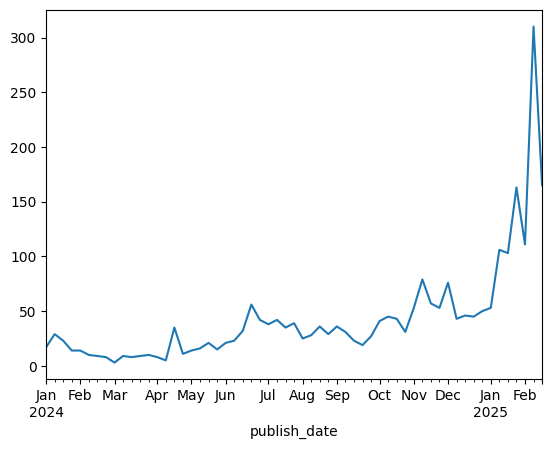

In [ ]:
# %%

# Trend over time
df.set_index("publish_date").resample("W").size().plot()

<Axes: xlabel='publish_date'>

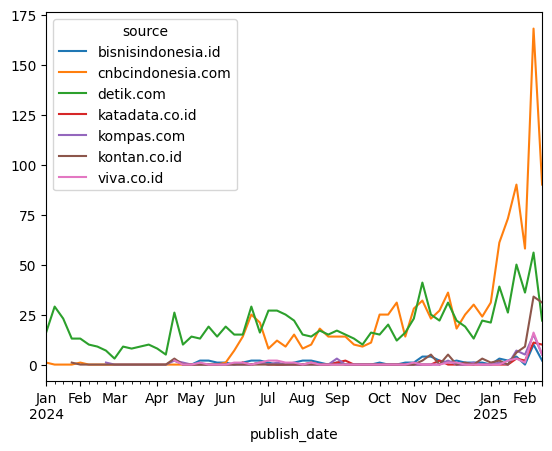

In [ ]:
# %%

# Trend by source
df.groupby("source").resample("W", on="publish_date").size().unstack(0).plot()

<Axes: xlabel='publish_hour'>

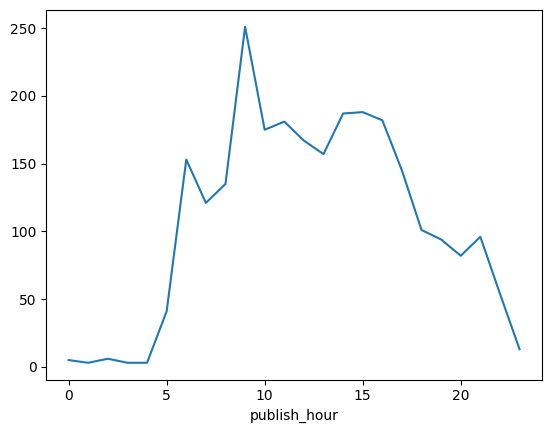

In [ ]:
# %%

# Hourly analysis
df["publish_hour"] = df["publish_date"].dt.hour
df.groupby("publish_hour").size().plot()

<Axes: ylabel='source'>

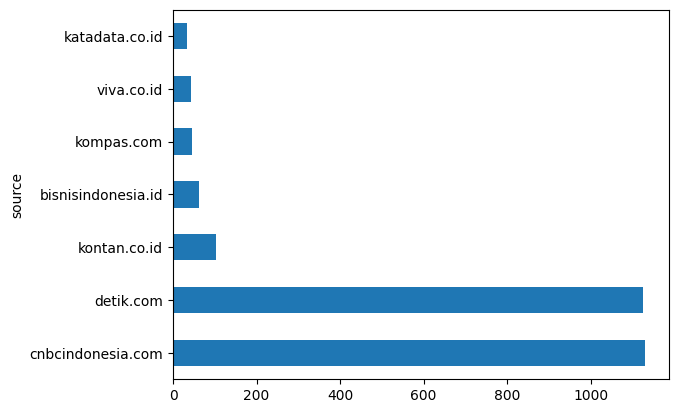

In [ ]:
# %%

df["source"].value_counts().plot(kind="barh")

<Axes: ylabel='keyword'>

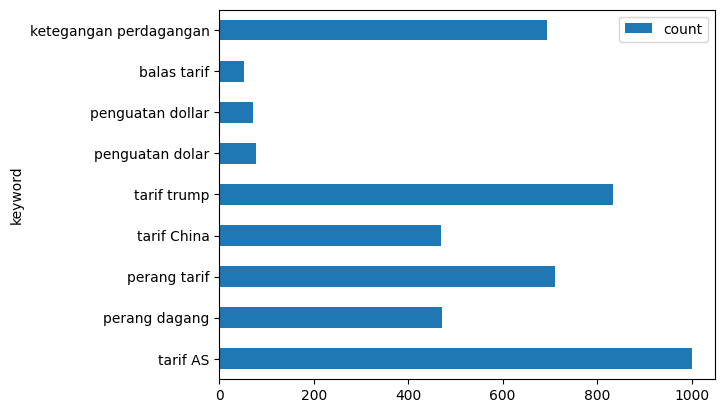

In [ ]:
# %%

from collections import Counter

# top keywords
keywords = df["keywords"].str.split(",").explode().str.strip()
keyword_freq = Counter(keywords)
keywords_df = pd.DataFrame(keyword_freq.items(), columns=["keyword", "count"])
keywords_df.set_index("keyword", inplace=True)
keywords_df.plot(kind="barh")

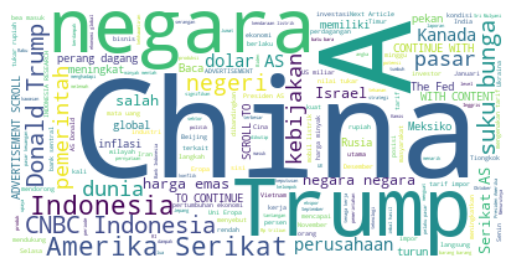

In [ ]:
# %%

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Indonesian text preprocessing
id_stopwords = set(stopwords.words("indonesian") + ["CNBC Indonesia", "jakarta"])

# Generate word cloud
text_corpus = " ".join(df["content"])
wordcloud_news = WordCloud(stopwords=id_stopwords, background_color="white").generate(
    text_corpus
)

plt.imshow(wordcloud_news, interpolation="bilinear")
plt.axis("off")
plt.show()